1. Step by step entire pipeline for a binary classification task:
    - Data loading
    - Data exploration & preprocessing (NaNs, (numerical) feature selection, outliers, target selection)
    - Train test split
    - Normalization
    - Training & testing (including metric selection & regularization)
        - Logistic regression
        - SVM
        - Simple neural net (Scikit-learn MLP)

2. A sample dataset to highlight differences for regression (e.g. diabetes dataset: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)
3. DIY task: Built pipeline for regression using real-life dataset (e.g. https://www.kaggle.com/datasets/jockeroika/life-style-data/code)
    - Still have an outline with each of the required steps to help them a little bit along, but minimal prepared code


# Classification and regression

In this notebook, we will explore two types of machine learning tasks: classification and regression. Additionally, instead of working with the nice and clean breast cancer set from the preprocessing notebook, we will have a look at a more messy dataset. 

Note that throughout the notebook, there are links to the relevant documentation for the functions and classes used. Click on the links and explore the documentation to deepen your understanding.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Set the style for our visualizations
sns.set_style("whitegrid")
sns.set_palette("deep")

%matplotlib inline

## Data loading
The diabetes dataset contains rows representing unique patient profiles. These profiles contain lots of different information on gender, age, ethnicity, income level, ... \
Let's have a look at the data before we do any Machine Learning shenanigans.
The usual way to load tabular data in python is with pandas [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html):

In [15]:
df = pd.read_csv('../data/diabetes_dataset.csv')
df

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


# Data exploration & preprocessing

*Task: The first thing you should do before working with data is* looking *at the data. So have a look - how does the data look like?* \
*Task: Explore the data with the methods introduced in 1-data-preprocessing (`isnull()`, [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html ), `describe()`).*

In [ ]:
# exploration and preprocessing steps go here

*Question: How many samples are in the diabetes dataset?*

Answer: As each row is a patient, and there are 100.000 rows, there are 100.000 samples.

*Question: Which are the feature columns in the dataset, and which one(s) is/are the targets?*

Answer: This depends! If we want to train a model to predict if someone is diabetic or not, we could use all columns as features except for the column diagnosed_diabetes, which would be our target. We could also train a model to predict the diabetes_risc_score, or the diabetes_stage, for example.

# Recap: Preprocessing data

*Question: Is this dataset ready for training a model on? Why?* 
Hint: Use the exploration methods 

Answer: You probably guessed it - why would we ask otherwise: it's not. 2 reasons: 

1. Categorical features: There are non-numerical features in the dataset. Our model would not know what to do with those. You can see that either by looking at the table above or by using `df.dtypes`.
2. Missing values: The column bmi contains missing values. You can see that either by looking at the table above or by using `df.isnull().sum()`

# Handle non-numerical columns
The dataframe contains many non-numerical columns, for example ethnicity and education level. One method of dealing with those columns is [One-Hot Encoding](https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial), which means creating a new binary column (0 or 1) for each category in the column. \
As an example: Instead of having one `education level` column with 'Highschool', 'Graduate', and 'Postgraduate', we will create three binary (0 or 1) columns `Highschool`, `Graduate`, and `Postgraduate`: 

In [16]:
non_num_cols = df.select_dtypes(exclude=['number']).columns
df = pd.get_dummies(df, columns=non_num_cols, drop_first=True, dtype=int)
df

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,diabetes_stage_No Diabetes,diabetes_stage_Pre-Diabetes,diabetes_stage_Type 1,diabetes_stage_Type 2
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,0,0,0,0,0,1,0,0,0,1
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,0,0,0,0,1,0,1,0,0,0
2,60,1,57,6.4,10.0,8.1,1,0,0,NaN,...,0,0,0,1,0,1,0,0,0,1
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,0,1,0,0,0,1,0,0,0,1
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,1,136,8.3,6.4,4.5,0,0,0,29.8,...,1,0,0,1,1,0,0,1,0,0
99996,41,3,76,8.8,6.8,4.8,0,0,0,26.5,...,0,0,0,0,0,1,0,1,0,0
99997,57,4,121,9.9,5.0,6.1,0,0,1,25.6,...,1,0,0,0,1,0,1,0,0,0
99998,47,3,52,5.9,6.7,0.5,0,1,0,26.8,...,0,1,0,0,0,1,0,1,0,0


What did calling the `pd.get_dummies` function do? How many columns are there now? \
Answer: It created binary columns at the end of the table which encode the categorical columns into binary columns. Therefore, there are now 46 columns.

# Handling Missing values
*Task: There are missing values in the `bmi` column. Use the method introduced in 2-dimensionality-reduction to impute them.* \
Hint: mean imputation


In [17]:
# Answer
# Filling missing values with the mean of each column (`df.mean()`) using the `fillna` method
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Train/Test split
For the first part, we will train a model for binary classification: Our model should predict if a person has diabetes or not. First, we have to select our target and our features for this task:

In [23]:
target_col = 'diagnosed_diabetes'
features = [c for c in df.columns if c != target_col]

Then, we split the dataset into training and testing:

In [ ]:
train_features, test_features, train_targets, test_targets = train_test_split(
    df[features], df[target_col], test_size=0.3, random_state=42
)

print(f"Training set shape: {train_features.shape}")
print(f"Testing set shape: {test_features.shape}")

print(
    f"Percent positives in training set: {train_targets.value_counts(normalize=True)[1]:.2f}"
)
print(
    f"Percent positives in testing set: {test_targets.value_counts(normalize=True)[1]:.2f}"
)

Training set shape: (70000, 45)
Testing set shape: (30000, 45)
Percent positives in training set: 0.60
Percent positives in testing set: 0.60


# Feature scaling
As we discussed in the first notebook, it is good practice to bring them all on the same scale so that features with larger scales will not dominate the learning process. There are features with different scales in the dataset:

<Axes: xlabel='value', ylabel='variable'>

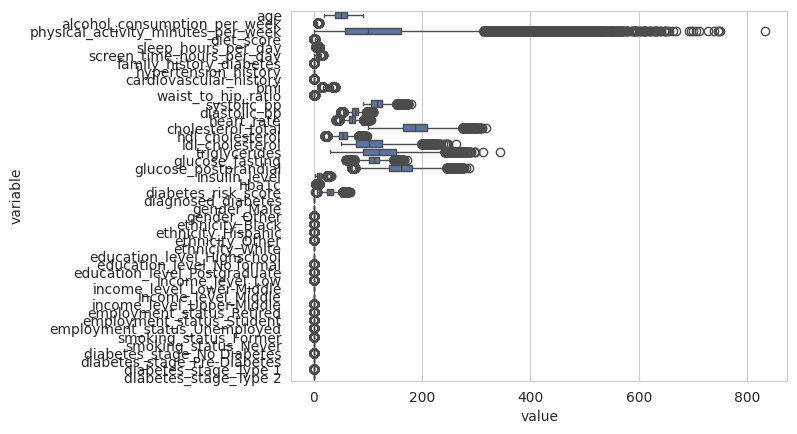

In [29]:
sns.boxplot(data=df.melt(), x="value", y="variable")

*Task: Use either the scaler.fit in combination with the scaler.transform methods or the scaler.fit_transform method to scale the training and testing features using both StandardScaler.*

In [31]:
scaler = StandardScaler()
train_features_standardized_array = scaler.fit_transform(train_features)
test_features_standardized_array = scaler.transform(test_features)

As these methods return numpy arrays, we can transform them back into a pandas dataframe with the original column names:

In [34]:
train_features_standardized = pd.DataFrame(train_features_standardized_array, columns=train_features.columns)
test_features_standardized = pd.DataFrame(test_features_standardized_array, columns=test_features.columns)

Let's visualise the effect of the feature scaling step:

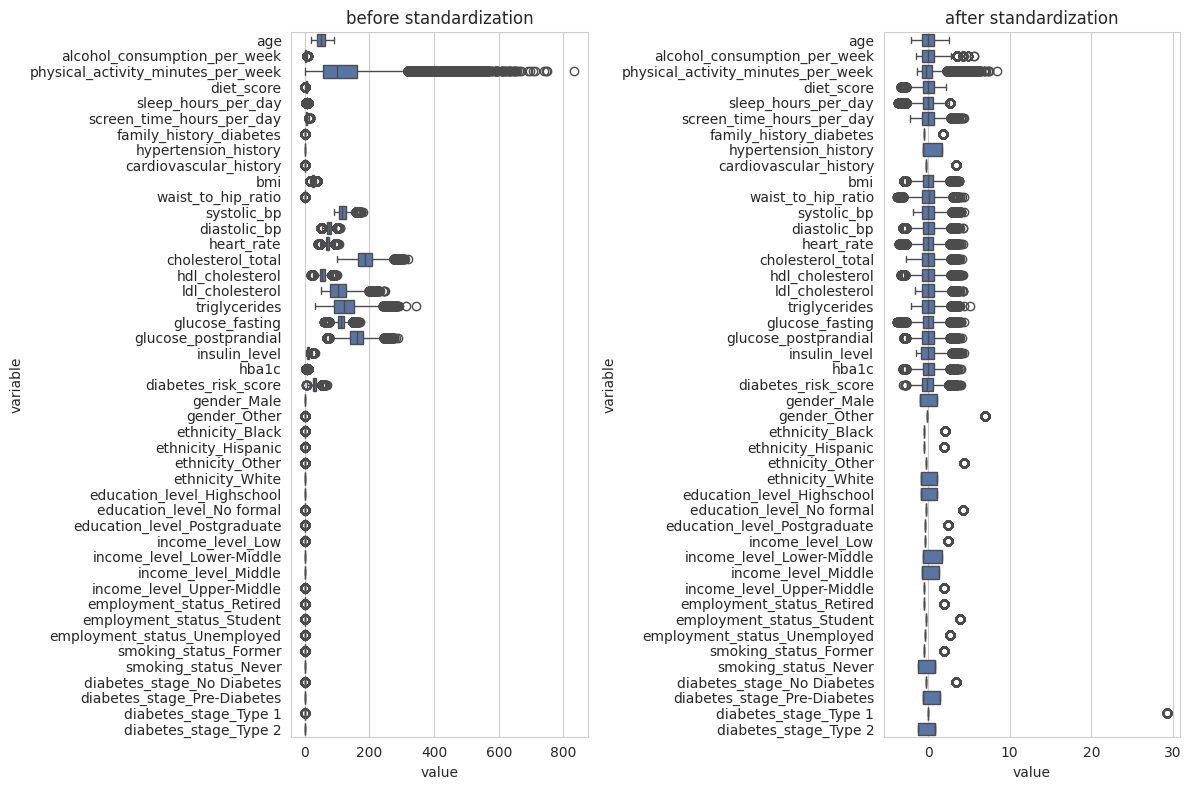

In [37]:
fig, axes = plt.subplots(figsize=(12, 8), ncols=2)

sns.boxplot(data=train_features.melt(), x="value", y="variable", ax=axes[0])
axes[0].set_title("before standardization")

sns.boxplot(data=train_features_standardized.melt(), x="value", y="variable", ax=axes[1])
axes[1].set_title("after standardization")

plt.tight_layout()
plt.show()

# Training & Testing
Robbins awesome tutorial goes here